# House Price Prediction Using Machine Learning

## Introduction

This project demonstrates the creation of an end-to-end machine learning pipeline for predicting house prices. By leveraging the power of regression models, we aim to predict the target variable, `SalePrice`, based on various features such as location, size, and other property characteristics.

### Objectives

- Build a regression model to predict house prices using the `AmesHousing` dataset.
- Follow a structured approach to preprocess the data, train the model, and evaluate its performance.
- Save the trained model and preprocessing steps for future use.
- Deploy the model as an interactive web application using Streamlit.

### Tools and Libraries Used

- **Python**: For coding the machine learning pipeline.
- **Scikit-learn**: For preprocessing, modeling, and evaluation.
- **Pandas**: For data manipulation and analysis.
- **Streamlit**: For creating an interactive web app for deployment.
- **Joblib**: For saving and loading machine learning models and pipelines.

### Workflow Overview

1. **Loading Data**: Import and explore the dataset to understand its structure.
2. **Data Preprocessing**: Clean the data, handle missing values, and perform feature scaling and encoding.
3. **Data Splitting**: Divide the dataset into training and testing sets.
4. **Model Selection**: Choose an appropriate regression algorithm.
5. **Model Training and Evaluation**: Train the model on the training set and evaluate its performance.
6. **Saving Artifacts**: Save the trained model and preprocessing steps for deployment.
7. **Streamlit Deployment**: Create an interactive web app for real-time predictions.


##**Step 1 - Load the Data**

The first step in any machine learning pipeline is to load and examine the dataset. Here, we:

1. Load the dataset using pandas.
2. Separate the features (independent variables) and the target variable (`SalePrice`).

The target variable is what the regression model will learn to predict. The features are the input variables the model uses to make predictions.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('AmesHousing.csv')

# Seperate the feature columns and the target column 'SalePrice'
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

##**Step 2 - Preprocess the Data**

Data preprocessing is critical for ensuring the dataset is ready for training the machine learning model. This step includes:

1. **Handling Missing Values:** Replace missing values with appropriate statistics (e.g., mean, median) or other strategies.
2. **Standardizing Numerical Features:** Scale numerical data to have a mean of zero and a standard deviation of one for consistent model performance.
3. **Encoding Categorical Variables:** Convert categorical features into numerical representations using methods such as one-hot encoding.
4. **Building Pipelines:** Use pipelines to automate the preprocessing steps, ensuring all data transformations are applied consistently.


In [ ]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create pipelines for the numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Use the preprocessor on the data
X_preprocessed = preprocessor.fit_transform(X)

##**Step 3 - Splitting Data**

Before training the model, the dataset is split into training and testing sets. This helps evaluate the model's performance on unseen data. Key aspects of this step include:

1. **Training Data:** Used to train the machine learning model.
2. **Testing Data:** Used to evaluate the model's performance and generalization ability.

The `train_test_split` function from scikit-learn splits the dataset into training and testing sets in a controlled manner, typically with an 80-20 or 70-30 split.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

##**Step 4 - Choosing a Model**

Selecting the right machine learning algorithm is crucial for building an effective model. For regression problems like house price prediction, commonly used models include:

1. **Linear Regression:** Assumes a linear relationship between features and the target variable.
2. **Random Forest Regressor:** An ensemble method that builds multiple decision trees and averages their predictions.
3. **Gradient Boosting Regressor:** An advanced ensemble method that builds trees sequentially to minimize error.

The choice of model depends on the problem's complexity and dataset characteristics.

Here, a Random Forest Regressor is chosen due to its robustness and ability to handle both numerical and categorical data.


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

## **Step 5 - Training and Evaluating the Model**

Once the model is selected, it is trained using the training dataset and evaluated on the testing dataset. This step includes:

1. **Training:** The model learns the patterns in the training data.
2. **Evaluation:** The model's performance is assessed using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 16033.104230635237
RMSE: 878220398.6666594


## **Step 6 - Saving the Model**

After training, the model is saved to a file. This allows reusability without needing to retrain. Popular libraries for saving models include:

1. **joblib:** Efficiently saves models and transformers.
2. **pickle:** Serializes Python objects for storage.

The trained model is saved as a .pkl file for later use.


In [ ]:
# Save the model
model_file = 'house_price_model.pkl'
joblib.dump(model, model_file)

['house_price_model.pkl']

## **Step 7 - Saving the Preprocessor**

The preprocessing steps applied to the training data must also be saved. This ensures that the same transformations are applied to any new data during inference.

The preprocessor pipeline is saved for use in the Streamlit app.

In [ ]:
import joblib

# Save the preprocessor
preprocessor_file = 'preprocessor.pkl'  # Save path for the preprocessor
joblib.dump(preprocessor, preprocessor_file)


['preprocessor.pkl']

##**Step 8 - Building a Streamlit App**

Streamlit allows you to create interactive web apps for machine learning models. The app will:

1. Load the saved model and preprocessor.
2. Take user input for feature values.
3. Make predictions and display the results.


##### Save the below file as app.py in the same folder and on the **Terminal** in VS Code type: streamlit run app.py

###Note - **Make sure your ipynb file and app.py file which you have saved are in the same folder in vs code**

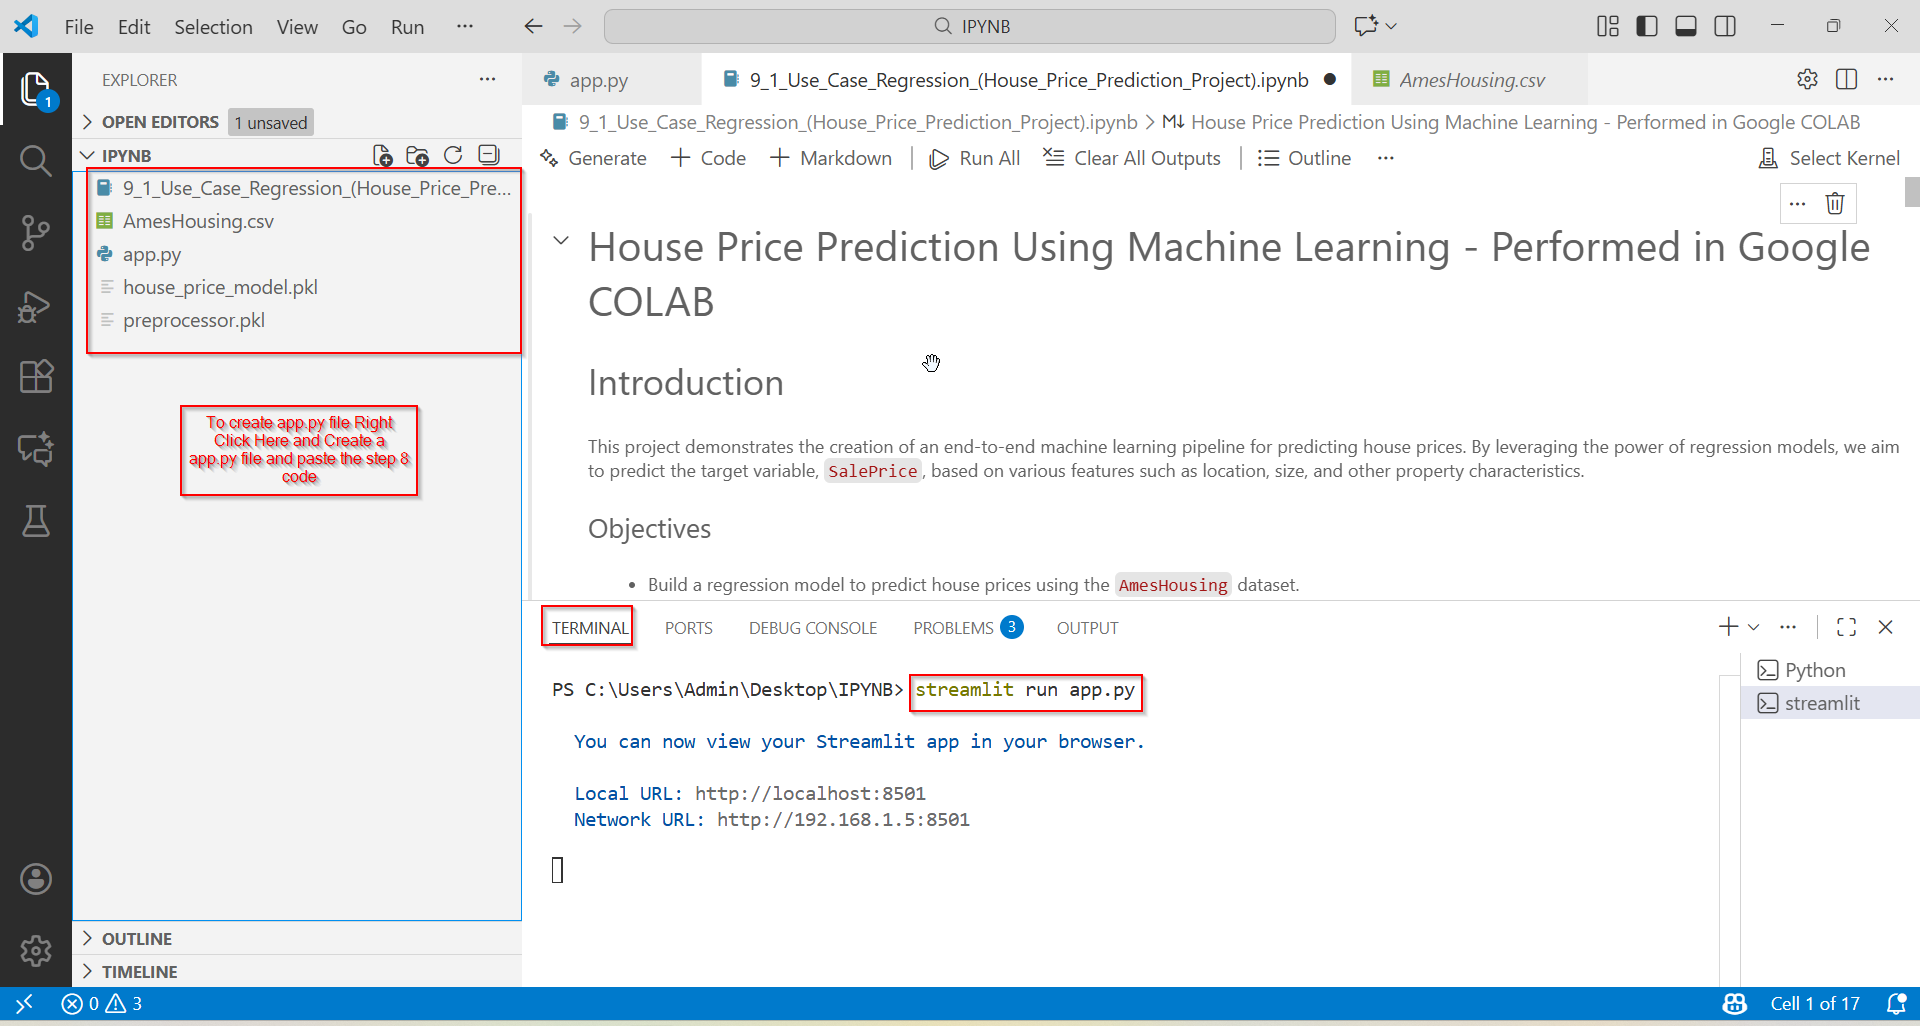

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model
model = joblib.load('house_price_model.pkl')

# Load the preprocessor
preprocessor = joblib.load('preprocessor.pkl')

# Define the input fields
st.title('House Price Prediction')

# Input fields
# Here, more complex features (strings/categorical) should be made into st.selectbox etc.

# Example numeric fields for simplicity:
lot_area = st.number_input('Lot Area', value=5000)
overall_qual = st.number_input('Overall Qual', min_value=1, max_value=10, value=5)
year_built = st.number_input('Year Built', value=1990)
total_bsmt_sf = st.number_input('Total Bsmt SF', value=1000)
first_flr_sf = st.number_input('1st Flr SF', value=1000)
full_bath = st.number_input('Full Bath', value=2)
gr_liv_area = st.number_input('Gr Liv Area', value=1500)
garage_cars = st.number_input('Garage Cars', value=1)
# You need to add more fields for all the mentioned features in a similar way here...

# Create a DataFrame for the input features
# Make sure the names of input fields match the ones expected by the preprocessor
input_data = pd.DataFrame({
    'Central Air': ['Y'],  # Example of default input for categorical feature
    'House Style': ['1Story'],  # Just examples for missing fields
    'Bsmt Full Bath': [1],
    'Kitchen Qual': ['TA'],
    'Bsmt Qual': ['TA'],
    'Exter Cond': ['TA'],
    'Neighborhood': ['NAmes'],
    'Garage Qual': ['TA'],
    'Bedroom AbvGr': [3],
    'MS Zoning': ['RL'],
    'Foundation': ['PConc'],
    'Misc Val': [0],
    'Fireplaces': [0],
    'Bsmt Unf SF': [400],
    'Low Qual Fin SF': [0],
    'Land Contour': ['Lvl'],
    'Bldg Type': ['1Fam'],
    'Garage Cond': ['TA'],
    'Bsmt Cond': ['TA'],
    'Alley': ['NA'],
    'Condition 2': ['Norm'],
    'Condition 1': ['Norm'],
    'Wood Deck SF': [0],
    'Overall Cond': [5],
    'Lot Config': ['Inside'],
    'Screen Porch': [0],
    'Lot Shape': ['Reg'],
    '3Ssn Porch': [0],
    'Fence': ['NA'],
    'Exterior 1st': ['VinylSd'],
    'Land Slope': ['Gtl'],
    'Heating QC': ['Ex'],
    'Street': ['Pave'],
    'Utilities': ['AllPub'],
    'MS SubClass': [20],
    'Exterior 2nd': ['VinylSd'],
    'Roof Style': ['Gable'],
    'Open Porch SF': [20],
    'Bsmt Exposure': ['No'],
    'Kitchen AbvGr': [1],
    'Paved Drive': ['Y'],
    'Year Remod/Add': [2000],
    'Garage Area': [500],
    'Pool QC': ['NA'],
    'Electrical': ['SBrkr'],
    'Roof Matl': ['CompShg'],
    'Sale Condition': ['Normal'],
    'Mo Sold': [6],
    'Misc Feature': ['NA'],
    'Bsmt Half Bath': [0],
    'Sale Type': ['WD'],
    'Half Bath': [1],
    'Garage Type': ['Attchd'],
    'Heating': ['GasA'],
    'BsmtFin SF 1': [500],
    'Yr Sold': [2010],
    'Functional': ['Typ'],
    'Pool Area': [0],
    'Exter Qual': ['TA'],
    'Garage Finish': ['Unf'],
    'Mas Vnr Type': ['None'],
    'Mas Vnr Area': [0],
    'Garage Yr Blt': [1990],
    'Enclosed Porch': [0],
    'TotRms AbvGrd': [6],
    'Order': [1],
    'Fireplace Qu': ['NA'],
    'BsmtFin Type 2': ['NA'],
    'PID': [0],  # Note this should be handled appropriately as it may not be in preprocessing
    'BsmtFin Type 1': ['GLQ'],
    'Lot Frontage': [60],
    'BsmtFin SF 2': [0],
    '2nd Flr SF': [0],

    # Features defined by the user
    'Lot Area': [lot_area],
    'Overall Qual': [overall_qual],
    'Year Built': [year_built],
    'Total Bsmt SF': [total_bsmt_sf],
    '1st Flr SF': [first_flr_sf],
    'Full Bath': [full_bath],
    'Gr Liv Area': [gr_liv_area],
    'Garage Cars': [garage_cars],
})

# Preprocess the input features
input_features_preprocessed = preprocessor.transform(input_data)

# Predict and display the output
if st.button('Predict'):
    prediction = model.predict(input_features_preprocessed)
    st.write(f'Predicted House Price: ${prediction[0]:,.2f}')


2025-11-22 09:30:25.607 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.018 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-22 09:30:26.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-22 09:30:26.033 Thread 'MainThread': mi

###After successfully running the code in Terminal you will have the output:


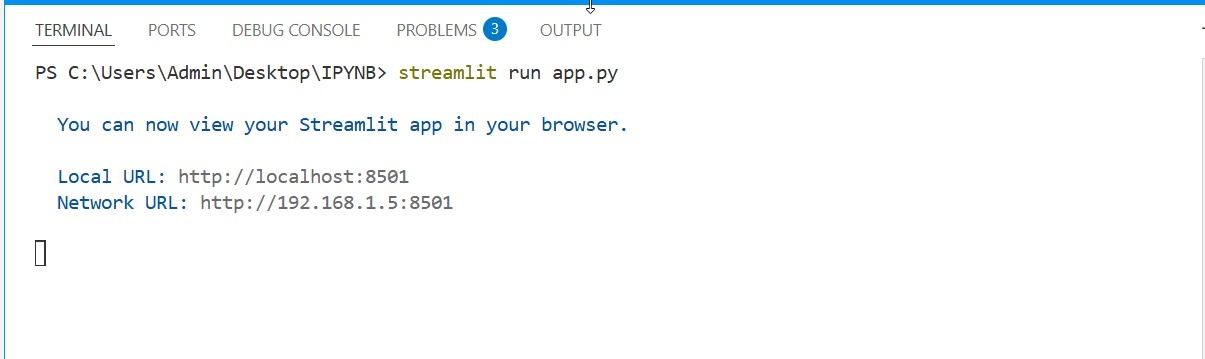


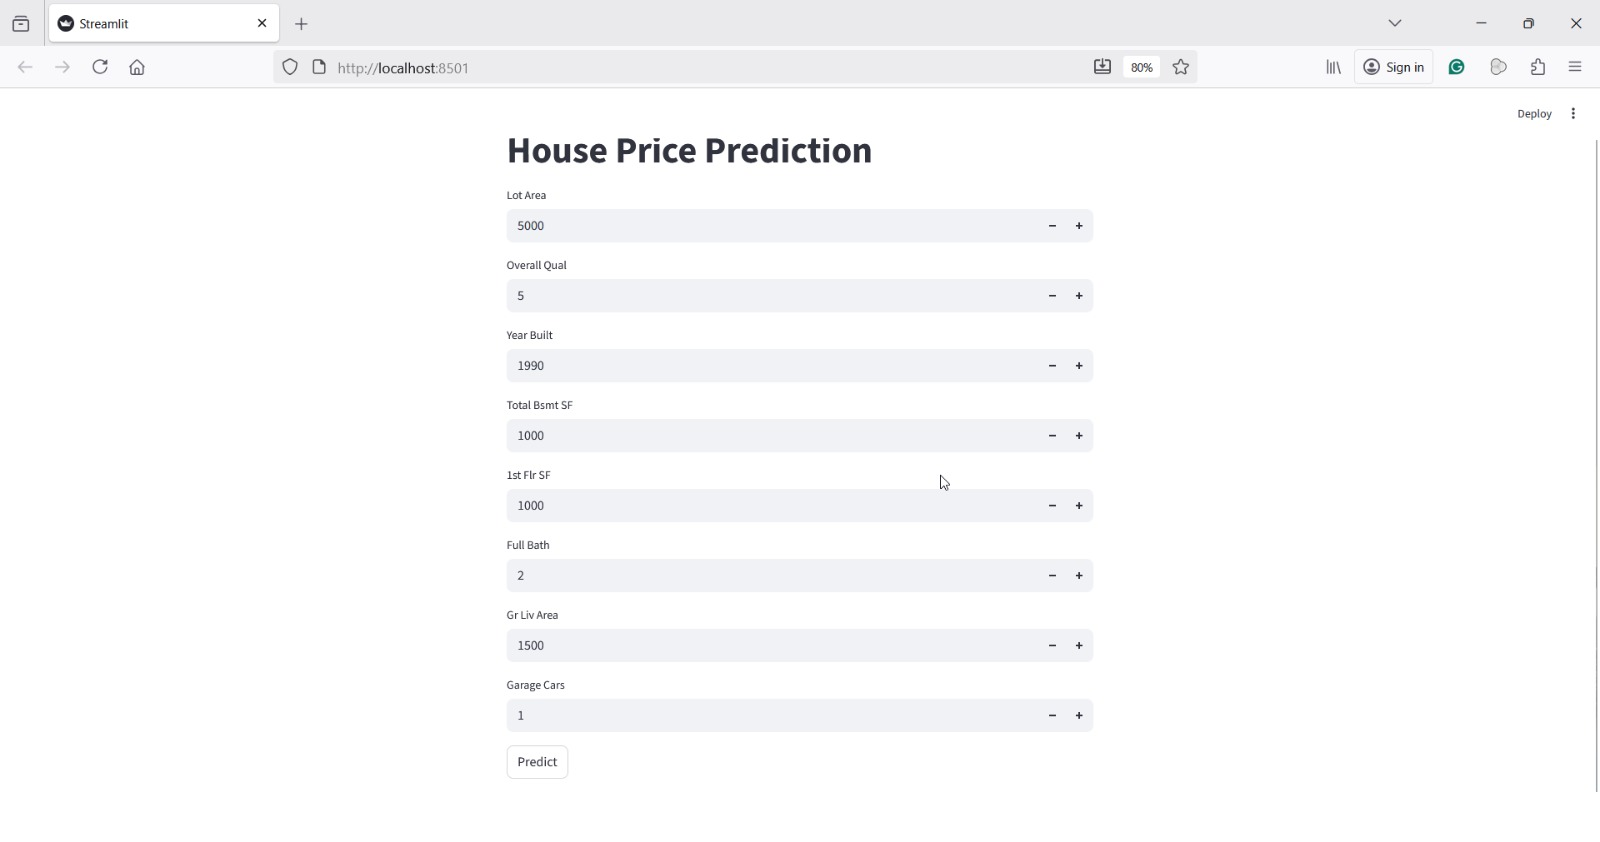